<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/OB/%EA%B3%BC%EC%A0%9C/WEEK02/ESAA_OB_WEEK02_assignmnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 7 앙상블 학습과 랜덤 포레스트**

### **[개념 정리]**

#### **7.5 부스팅**

부스팅(Boosting)

: 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법
- 앞의 모델을 보완해나가며 예측기를 학습시킴

---

##### **7.5.1 에이다부스트**

에이다부스트(Adaptive boosting)

: 이전 예측기를 보완하기 위해, 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 방법

**[에이다부스트 분류기의 과정]**
1. 알고리즘이 기반이 되는 첫 번째 분류기를 훈련 세트에서 훈련시키고 예측 생성
2. 알고리즘이 잘못 분류된 훈련 샘플의 가중치를 상대적으로 높임
3. 두 번째 분류기는 업데이트된 가중치를 사용해 훈련 세트에서 훈련하고 다시 예측 생성

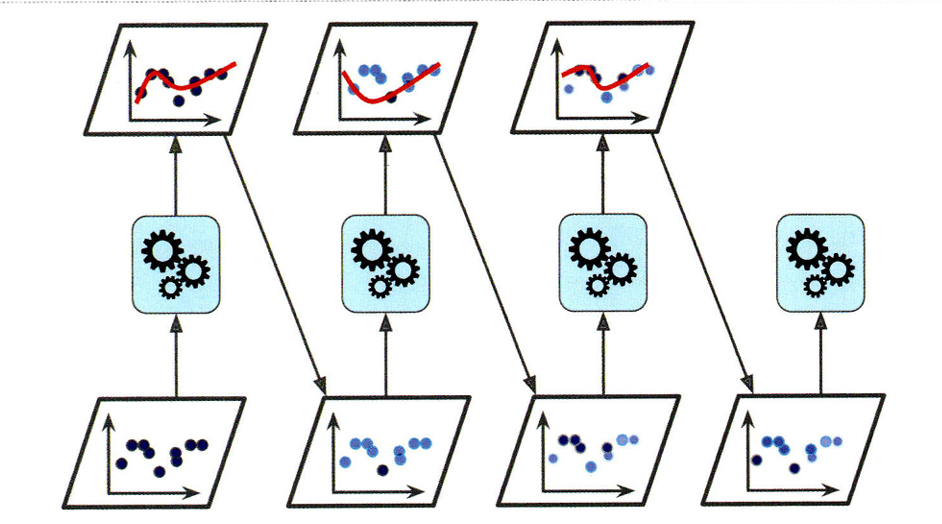

[경사 하강법과 에이다부스트의 차이]
- 경사 하강법 -> 비용 함수를 최소화하기 위해 한 예측기의 모델 파라미터를 조정해 감
- 에이다부스트 -> 점차 성능이 더 좋아지도록 예측기를 추가

**[에이다부스트 알고리즘]**
1. 각 샘플 가중치 $w^{(i)}$는 초기에 $\frac{1}{m}$로 초기화
2. 첫 번째 예측기가 학습되고, 가중치가 적용된 에러율 $r_1$이 훈련 세트에 대해 계산

- $j$번째 예측기의 가중치가 적용된 에러율
$$
r_j = \frac{\displaystyle \sum_{\substack{i=1 \\ \hat{y}_j^{(i)} \neq y^{(i)}}}^{m} w^{(i)}}{\displaystyle \sum_{i=1}^{m} w^{(i)}}
$$

  - 여기서 $\hat{y}_j^{(i)}$는 $i$번째 샘플에 대한 $j$번째 예측기의 예측

- 예측기 가중치

$\alpha_j = \eta \log \frac{1 - r_j}{r_j}$

여기서 $\eta$는 학습률 파라미터

- 가중치 업데이트 규칙

$$
w^{(i)} \leftarrow \left\{
\begin{array}{ll}
w^{(i)} & \hat{y}_j^{(i)} = y^{(i)} \text{일 때} \\
w^{(i)} \exp(\alpha_j) & \hat{y}_j^{(i)} \neq y^{(i)} \text{일 때}
\end{array}
\right.
$$

여기서 $i = 1, 2, \dots, m$

- 에이다부스트 예측

$$
\hat{y}(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \sum_{\substack{j=1 \\ \hat{y}_j(\mathbf{x})=k}}^{N} \alpha_j
$$

여기서 $N$은 예측기 수

--> 가중치 합이 가장 큰 클래스가 예측 결과가

에이다부스트 알고리즘은 지정된 예측기 수에 도달하거나 완벽한 예측기가 생성되면 중지됨!



##### **7.5.2 그레이디언트 부스팅**

그레이디언트 부스팅(Gradient boosting)

: 에이다부스트와 유사하게 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가
- 에이다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 **잔여 오차(residual error)**에 새로운 예측기 학습

- learning_rate 매개변수: 각 트리의 기여 정도를 조절


#### **7.6 스태킹**

스태킹(Stacking: stacked generalization)

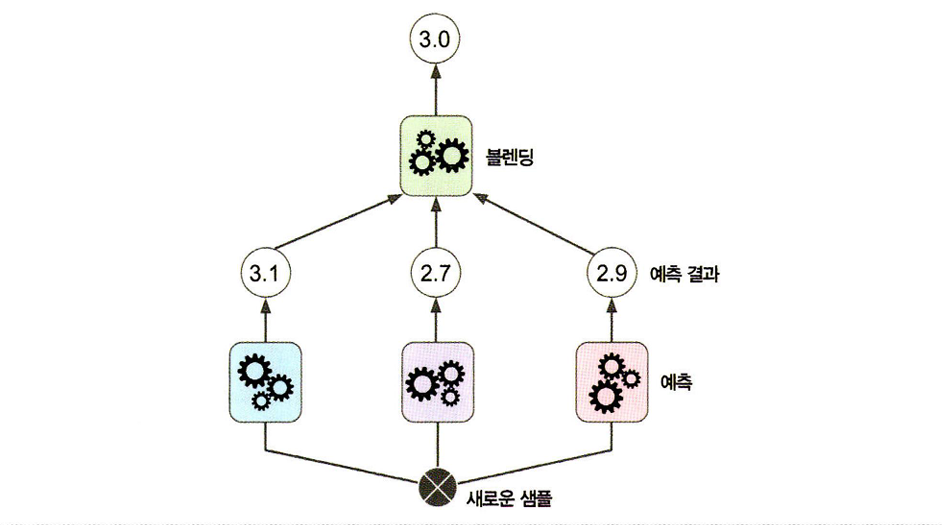

- 위 세 예측기는 각각 다른 값을 예측하고, 마지막 예측기(블렌더(Blender) 또는 메타 학습기(Meta learner)가 이 예측을 입력으로 받아 최종 예측 생성

[블렌더 학습]
- 홀드 아웃(hold-out) 세트 사용

1. 먼저 훈련 세트를 두 개의 서브 세트로 분리
  - 첫 번쨰 서브셋은 첫 번째 레이어의 예측을 훈련시키기 위해 사용



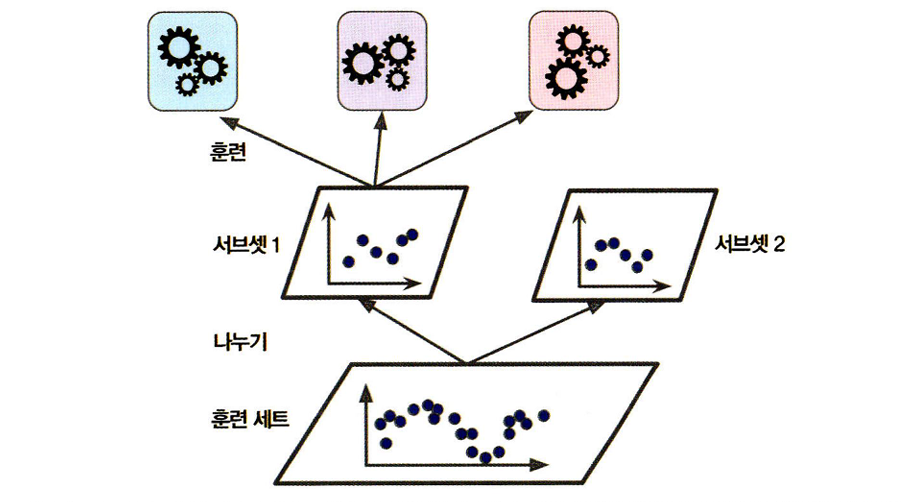

2. 첫 번쨰 레이어의 예측기를 사용해 두 번째 (홀드 아웃) 세트에 대한 예측 생성
- 홀드 아웃 세트의 각 샘플에 대해 세 개의 예측값 존재
- 타겟값은 그대로, 앞에서 예측한 값을 입력 특성으로 사용하는 새로운 훈련 세트를 생성

--> 즉, 첫 번째 레이어의 예측을 가지고 타겟값을 예측하도록 학습됨



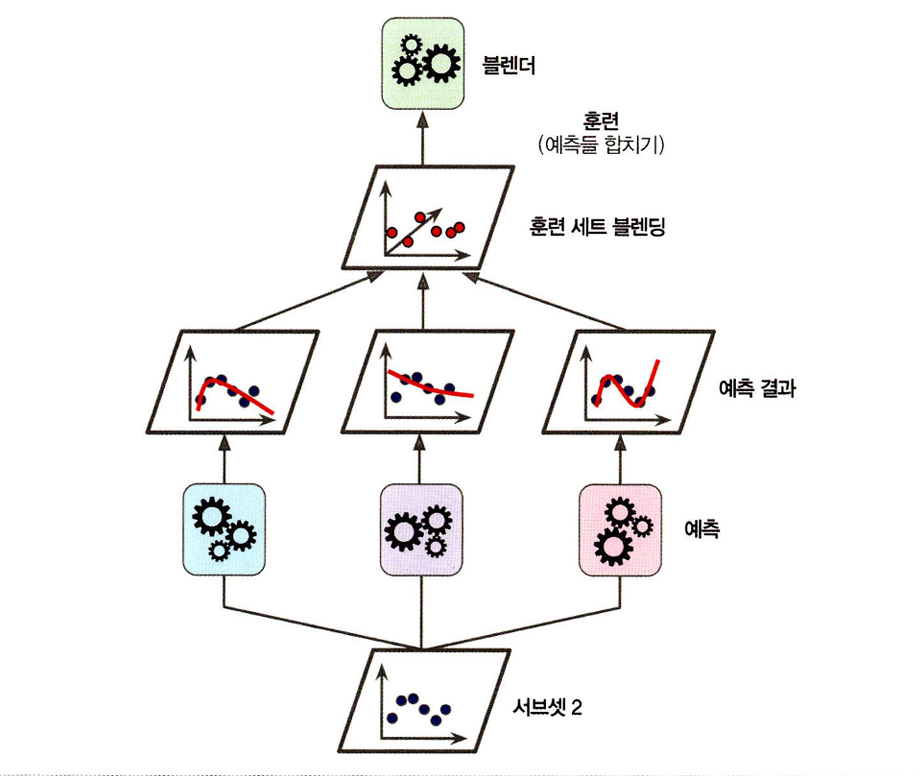

### **[필사]**

#### **7.5 부스팅**

##### **7.5.1 에이다부스트**

In [2]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

# 5장에서의 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

##### **7.5.2 그레이디언트 부스팅**

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [7]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [10]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [9]:
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

120개의 트리로 GBRT 앙상블 훈련 및 최적의 트리 수를 찾기 위해 각 훈련 단계에서 검증 오차 측정

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(53))

조기 종료 `warm_state=True`

In [13]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error =float("inf")
error_going_up = 0 # 검증 오차가 더 이상 감소하지 않고 연속으로 증가한 횟
for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred =gbrt.predict(X_val)
  val_error = mean_squared_error(y_val, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break # 조기 종료

In [15]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

XGBoost는 자동 조기 종료와 같은 기능 제공

In [16]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds=2)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.39433
[1]	validation_0-rmse:0.34972
[2]	validation_0-rmse:0.32568
[3]	validation_0-rmse:0.31759
[4]	validation_0-rmse:0.31694
[5]	validation_0-rmse:0.31917
[6]	validation_0-rmse:0.32249


#### **7.6 스태킹**